## Starbucks Drink Analysis
### Caroline Lowenstein
### DS 4003

### Data Background information

This data was collected to answer the following questions:
    - Can you train a Markov Chain to generate new Starbucks drink or food items?
    - Can you design an easy-to-interpret visualization for the nutrition of each item?
    - How to Starbucks menu items compare to McDonald’s menu items (see link to dataset below) in terms of nutrition?

I just looked at the Starbucks data, not the McDonald's data.

Starbucks is the owner of the data and the admin is a woman named Rachael Tatman

Tatmam works for Kaggle, and she collected the data to answer the above questions and give to kaggle users to manipulate. 

The data description can be found here: https://www.kaggle.com/datasets/starbucks/starbucks-menu


I chose this data because I wanted my project to be centered around food, and I am a frequent starbucks goer.  There was a lot of data, and I can picture different ways I can manipulate it and create visual representations of it. 


In [1]:
#import dependencies
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load in data
df=pd.read_csv('/Users/carolinelowenstein/Desktop/everything/DS/app final after 4:9/NEW DATA 4:9/starbucks_drinkMenu_expanded.csv')

General Information:

In [3]:
#analyze the first 5 rows
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
#looking at basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
#look for missing data
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

Drop Missing Data

In [6]:
#drop missing data
df.dropna(inplace=True)
print(df.isnull)

<bound method DataFrame.isnull of               Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Crea

In [7]:
#checking the miss value is gone
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

Analyzing the Beverage column

In [8]:
#finding the unique values in the beverage column 
df.Beverage.unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [9]:
#changing names to drop "Without Whipped Cream," because all of the drinks are without whipped cream; adding a note to metadata that all data is without whipped cream
df= df.set_index('Beverage')
df= df.rename(index={"Strawberries & Crème (Without Whipped Cream)": "Strawberries & Crème"})
df= df.rename(index={"Vanilla Bean (Without Whipped Cream)": "Vanilla Bean"})
df= df.rename(index={"Java Chip (Without Whipped Cream)": "Java Chip"})
df= df.rename(index={"Caramel (Without Whipped Cream)": "Caramel"})
df= df.rename(index={"Mocha (Without Whipped Cream)": "Mocha"})
df= df.rename(index={"Hot Chocolate (Without Whipped Cream)": "Hot Chocolate"})
df= df.rename(index={"Caramel Apple Spice (Without Whipped Cream)": "Caramel Apple Spice"})
df= df.rename(index={"White Chocolate Mocha (Without Whipped Cream)": "White Chocolate Mocha"})
df= df.rename(index={"Caffè Mocha (Without Whipped Cream)": "Caffè Mocha"})

#change Vanilla Latte and Skinny  Latte name to shorten it
df= df.rename(index={"Vanilla Latte (Or Other Flavoured Latte)": "Flavored Latte"})
df= df.rename(index={"Skinny Latte (Any Flavour)'": "Skinny Flavored Latte"})



In [10]:
df

,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage,,,,,,,,,,,,,,,,,
Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strawberries & Crème,Frappuccino® Blended Crème,Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
Vanilla Bean,Frappuccino® Blended Crème,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
Vanilla Bean,Frappuccino® Blended Crème,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0


In [11]:
#reset index 
df.reset_index(inplace = True)
df.head()
#(notes for me later: reset back by making axis =1)

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [12]:
#Drop columns because I want my app to focus on calories, total fat, total carbs, sugar, and caffeine
df= df.drop(['Trans Fat (g) '], axis=1)
df= df.drop(['Saturated Fat (g)'], axis=1)
df= df.drop([' Sodium (mg)'], axis=1)
df= df.drop(['Cholesterol (mg)'], axis=1)
df= df.drop([' Dietary Fibre (g)'], axis=1)
df= df.drop(['Vitamin A (% DV) '], axis=1)
df= df.drop(['Vitamin C (% DV)'], axis=1)
df= df.drop(['Iron (% DV) '], axis=1)
df= df.drop([' Calcium (% DV) '], axis=1)
df= df.drop([' Total Carbohydrates (g) '], axis=1)

### UPDATES MADE ON MARCH 27TH

In [13]:
#Fixing the Beverage_prep column to seperate size and milk type
specified_size = df['Beverage_prep'].str.contains('Short|Tall|Grande|Venti')
df.loc[specified_size, 'Size'] = df.loc[specified_size, 'Beverage_prep'].str.split().str[0]


In [14]:
#Filling in the empty size rows with the correct size
df['Size'] = df['Size'].fillna(method='ffill')

In [15]:
df

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg),Size
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175,Short
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260,Tall
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330,Grande
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410,Venti
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75,Short
...,...,...,...,...,...,...,...,...,...
236,Strawberries & Crème,Frappuccino® Blended Crème,Soymilk,320,3 2,64,5.0,0,Venti
237,Vanilla Bean,Frappuccino® Blended Crème,Tall Nonfat Milk,170,0.1,38,4.0,0,Tall
238,Vanilla Bean,Frappuccino® Blended Crème,Whole Milk,200,3.5,38,3.0,0,Tall
239,Vanilla Bean,Frappuccino® Blended Crème,Soymilk,180,1.5,35,3.0,0,Tall


In [16]:
specified_milk = df['Beverage_prep'].str.contains('Nonfat Milk|2% Milk|Soymilk')
df.loc[specified_milk, 'Milk_type'] = df.loc[specified_milk, 'Beverage_prep'].str.split(n=1).str[0]


In [17]:
df.head(50)

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg),Size,Milk_type
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175,Short,NaN
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260,Tall,NaN
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330,Grande,NaN
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410,Venti,NaN
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75,Short,Short
5,Caffè Latte,Classic Espresso Drinks,2% Milk,100,3.5,9,6.0,75,Short,2%
6,Caffè Latte,Classic Espresso Drinks,Soymilk,70,2.5,4,5.0,75,Short,Soymilk
7,Caffè Latte,Classic Espresso Drinks,Tall Nonfat Milk,100,0.2,14,10.0,75,Tall,Tall
8,Caffè Latte,Classic Espresso Drinks,2% Milk,150,6,14,10.0,75,Tall,2%
9,Caffè Latte,Classic Espresso Drinks,Soymilk,110,4.5,6,8.0,75,Tall,Soymilk


In [18]:
#Fixing the errors to get correct Nonfat milk description
df['Milk_type'] = df['Milk_type'].str.replace("Short", "Nonfat")
df['Milk_type'] = df['Milk_type'].str.replace("Grande", "Nonfat")
df['Milk_type'] = df['Milk_type'].str.replace("Tall", "Nonfat")
df['Milk_type'] = df['Milk_type'].str.replace("Venti", "Nonfat")


In [19]:
df.head(50)

,Beverage,Beverage_category,Beverage_prep,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg),Size,Milk_type
0,Brewed Coffee,Coffee,Short,3,0.1,0,0.3,175,Short,NaN
1,Brewed Coffee,Coffee,Tall,4,0.1,0,0.5,260,Tall,NaN
2,Brewed Coffee,Coffee,Grande,5,0.1,0,1.0,330,Grande,NaN
3,Brewed Coffee,Coffee,Venti,5,0.1,0,1.0,410,Venti,NaN
4,Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,9,6.0,75,Short,Nonfat
5,Caffè Latte,Classic Espresso Drinks,2% Milk,100,3.5,9,6.0,75,Short,2%
6,Caffè Latte,Classic Espresso Drinks,Soymilk,70,2.5,4,5.0,75,Short,Soymilk
7,Caffè Latte,Classic Espresso Drinks,Tall Nonfat Milk,100,0.2,14,10.0,75,Tall,Nonfat
8,Caffè Latte,Classic Espresso Drinks,2% Milk,150,6,14,10.0,75,Tall,2%
9,Caffè Latte,Classic Espresso Drinks,Soymilk,110,4.5,6,8.0,75,Tall,Soymilk


In [20]:
#Fixing the size of Espresso
df.at[57, 'Size'] = df.at[57, 'Size'].replace('Venti', 'Doppio')
df.at[56, 'Size'] = df.at[56, 'Size'].replace('Venti', 'Solo')


In [21]:
#Moving the original Beverage_prep column to be the last column.  I'm keeping it in the dataframe because I want to be able to use it for reference if I need to
column = df.pop('Beverage_prep')
df['Beverage_prep'] = column

In [22]:
#I used this to see if my changes were working
df.head(60)

,Beverage,Beverage_category,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg),Size,Milk_type,Beverage_prep
0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,NaN,Short
1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,NaN,Tall
2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,NaN,Grande
3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,NaN,Venti
4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk
5,Caffè Latte,Classic Espresso Drinks,100,3.5,9,6.0,75,Short,2%,2% Milk
6,Caffè Latte,Classic Espresso Drinks,70,2.5,4,5.0,75,Short,Soymilk,Soymilk
7,Caffè Latte,Classic Espresso Drinks,100,0.2,14,10.0,75,Tall,Nonfat,Tall Nonfat Milk
8,Caffè Latte,Classic Espresso Drinks,150,6,14,10.0,75,Tall,2%,2% Milk
9,Caffè Latte,Classic Espresso Drinks,110,4.5,6,8.0,75,Tall,Soymilk,Soymilk


# UPDATES MADE 4/9

In [23]:
#Filling in NaN values
df['Milk_type'].fillna("No milk option", inplace=True)

In [24]:
df.head()

,Beverage,Beverage_category,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine (mg),Size,Milk_type,Beverage_prep
0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk


### END UPDATES

Changing column names and dropping columns

In [25]:
#renaming Caffeine to make it easier to use later
df= df.rename(columns={"Caffeine (mg)": "Caffeine_mg"})
df.head()

,Beverage,Beverage_category,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine_mg,Size,Milk_type,Beverage_prep
0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk


In [26]:
#reset index 
df.reset_index(inplace = True)
df.head()
#(notes for me later: reset back by making axis =1)

,index,Beverage,Beverage_category,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine_mg,Size,Milk_type,Beverage_prep
0,0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk


In [27]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [28]:
df

,index,Beverage,Beverage_category,Calories,Total Fat (g),Sugars (g),Protein (g),Caffeine_mg,Size,Milk_type,Beverage_prep
0,0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk
...,...,...,...,...,...,...,...,...,...,...,...
236,236,Strawberries & Crème,Frappuccino® Blended Crème,320,3 2,64,5.0,0,Venti,Soymilk,Soymilk
237,237,Vanilla Bean,Frappuccino® Blended Crème,170,0.1,38,4.0,0,Tall,Nonfat,Tall Nonfat Milk
238,238,Vanilla Bean,Frappuccino® Blended Crème,200,3.5,38,3.0,0,Tall,No milk option,Whole Milk
239,239,Vanilla Bean,Frappuccino® Blended Crème,180,1.5,35,3.0,0,Tall,Soymilk,Soymilk


In [29]:
#Rename columns so they are easier to use later and getting rid of random spaces
df = df.rename(columns={' Total Fat (g)': 'Total_Fat_g'})
df = df.rename(columns={' Total Carbohydrates (g) ': 'Total_Carb_g'})
df = df.rename(columns={' Sugars (g)': 'Sugars_g'})
df = df.rename(columns={' Protein (g) ': 'Protein_g'})




In [30]:
df.head()

,index,Beverage,Beverage_category,Calories,Total_Fat_g,Sugars_g,Protein_g,Caffeine_mg,Size,Milk_type,Beverage_prep
0,0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk


Yay! The columns have been dropped that I don't plan on using and the names have been changed so I can use them easily in the future

Analyze the non-numerical data

In [31]:
pd.unique(df.Beverage)

array(['Brewed Coffee', 'Caffè Latte', 'Caffè Mocha', 'Flavored Latte',
       'Caffè Americano', 'Cappuccino', 'Espresso',
       'Skinny Latte (Any Flavour)', 'Caramel Macchiato',
       'White Chocolate Mocha', 'Hot Chocolate', 'Caramel Apple Spice',
       'Tazo® Tea', 'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee', 'Mocha', 'Caramel',
       'Java Chip', 'Strawberries & Crème', 'Vanilla Bean'], dtype=object)

In [32]:
pd.unique(df.Beverage_category)

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [33]:
pd.unique(df.Beverage_prep)

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

Fixing the Caffeine variable below

In [34]:
#Making the "Varies" value in the Caffeine column a null value so I'm working with numerical data
df = df.replace({'Caffeine_mg': {'Varies': np.nan, 'varies': np.nan}})


In [35]:
#Dropping null values
#df.dropna(inplace=True)
#print(df.isnull)
df = df.dropna(subset=['Caffeine_mg'])


In [36]:
df.head()

,index,Beverage,Beverage_category,Calories,Total_Fat_g,Sugars_g,Protein_g,Caffeine_mg,Size,Milk_type,Beverage_prep
0,0,Brewed Coffee,Coffee,3,0.1,0,0.3,175,Short,No milk option,Short
1,1,Brewed Coffee,Coffee,4,0.1,0,0.5,260,Tall,No milk option,Tall
2,2,Brewed Coffee,Coffee,5,0.1,0,1.0,330,Grande,No milk option,Grande
3,3,Brewed Coffee,Coffee,5,0.1,0,1.0,410,Venti,No milk option,Venti
4,4,Caffè Latte,Classic Espresso Drinks,70,0.1,9,6.0,75,Short,Nonfat,Short Nonfat Milk


In [37]:
#Making Caffeine_mg all integers so I can make a boxplot
df['Caffeine_mg'] = df['Caffeine_mg'].astype(int)

In [38]:
#Confirming they are all now integers
Caffeine_mg = df['Caffeine_mg'].dtype
Caffeine_mg


dtype('int64')

In [39]:
#confirming "Varies" has been dropped and all values are numeric 
pd.unique(df.Caffeine_mg)

array([175, 260, 330, 410,  75, 150,  85,  95, 180, 225, 300,  10,  20,
        25,  30,   0,  50,  70, 120,  55,  80, 110, 165, 235,  90, 125,
       170,  15, 130, 140, 100, 145,  65, 105])

Fixing the Total Fat variable below

In [40]:
#Checking if integers in other columns
Total_Fat_g = df['Total_Fat_g'].dtype
Total_Fat_g

dtype('O')

In [41]:
#Because total fat isn't an integer, I'm checking to see if there are any strings or objects
pd.unique(df.Total_Fat_g)

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [42]:
#One value is equal to 3 2, so I'm going to make it null
df = df.replace({'Total_Fat_g': {'3 2': np.nan}})
#df.dropna(inplace=True)
#print(df.isnull)

df = df.dropna(subset=['Total_Fat_g'])


In [43]:
df['Total_Fat_g'] = df['Total_Fat_g'].astype(float)

Checking that the rest of the variables are numeric and looking at unique values

In [44]:
pd.unique(df.Calories)

array([  3,   4,   5,  70, 100, 150, 110, 130, 190, 170, 240, 200, 180,
       220, 260, 230, 280, 340, 290, 160, 250, 210, 320, 270,  10,  15,
        25,  50,  80,  60,  90, 120, 140, 300, 310, 350, 400, 370, 450,
       510, 460, 380, 330, 360, 390, 420, 430])

In [45]:
Calories = df['Calories'].dtype
Calories

dtype('int64')

In [46]:
pd.unique(df.Sugars_g)

array([ 0,  9,  4, 14,  6, 18, 17,  8, 23, 22, 11, 13, 27, 26, 20, 34, 44,
       43, 33, 35, 45,  7,  3, 10,  5, 16, 21, 15, 24, 32, 41, 40, 31, 29,
       25, 39, 58, 51, 74, 64, 55, 54, 49, 65, 83, 28, 42, 37, 53, 46, 56,
       71, 19, 30, 38, 36, 50, 47, 69, 66, 76, 73, 59, 77, 62, 60, 84, 80,
       52, 68])

In [47]:
Sugars_g = df['Sugars_g'].dtype
Sugars_g

dtype('int64')

In [48]:
pd.unique(df.Protein_g)

array([ 0.3,  0.5,  1. ,  6. ,  5. , 10. ,  8. , 13. , 12. , 16. ,  7. ,
        9. , 11. , 17. , 14. , 15. ,  0.4,  3. ,  4. , 19. , 18. ,  0. ,
        0.2,  2. , 20. ])

In [49]:
Protein_g = df['Protein_g'].dtype
Protein_g

dtype('float64')

The data is all numeric now, so box plots can be made

In [50]:
#Dropping skinny latte because they don't have all the sizes
df.drop([58, 59, 60, 61], inplace=True)


### Box Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa409bcb700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa409bcbc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa409bcb460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa409bea1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa409bea460>],
 'means': []}

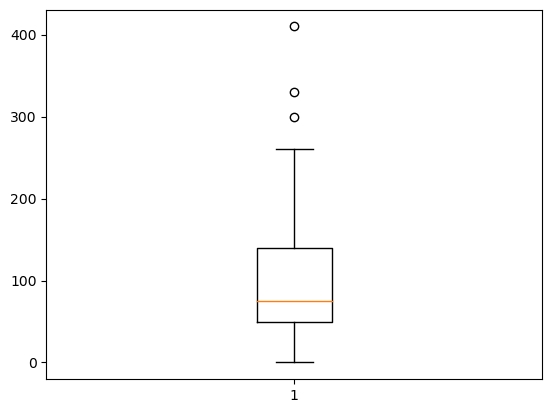

In [51]:
#Create a boxplot of Caffiene, specifically to observe outliers
plt.boxplot(df.Caffeine_mg, )

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa409e7f3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa409e7f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa409e7f100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa409e7fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa409e7ffa0>],
 'means': []}

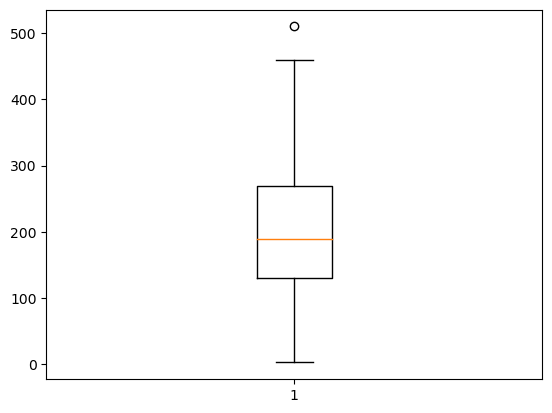

In [52]:
#Using plots to visualize 
plt.boxplot(df.Calories)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa40a82d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa40a82d7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa40a81efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40a82dd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40a82dfd0>],
 'means': []}

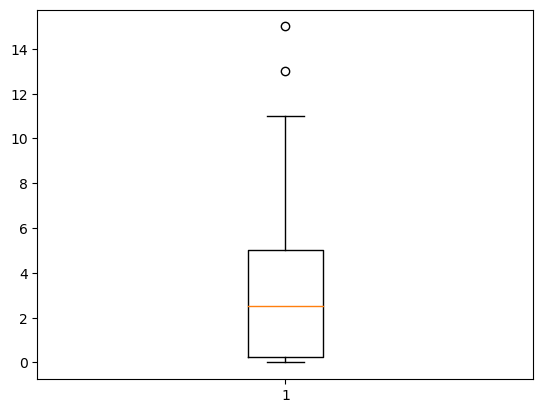

In [53]:
#Using plots to visualize 
plt.boxplot(df.Total_Fat_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa40a998280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa40a9987c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa409eef100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40a998d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40a998fa0>],
 'means': []}

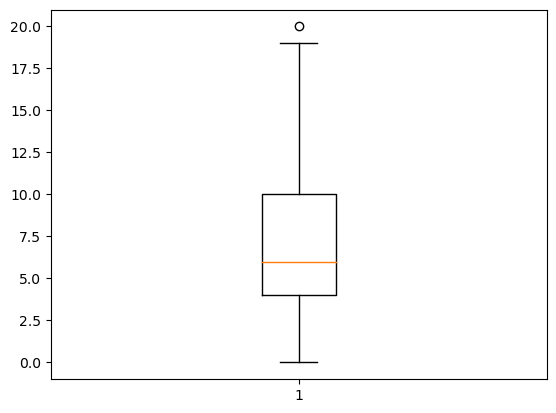

In [54]:
#Using plots to visualize 
plt.boxplot(df.Protein_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa40abefe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa40ac023d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa40abefbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40ac02910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40ac02bb0>],
 'means': []}

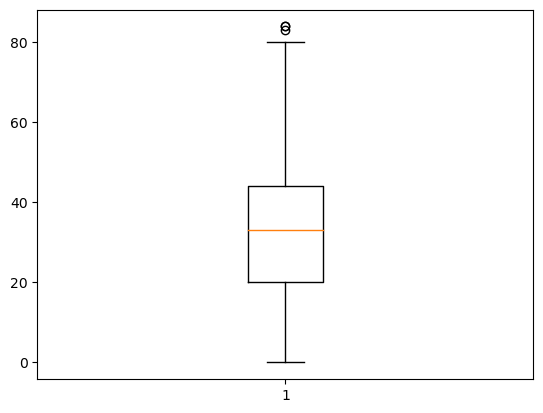

In [55]:
#Using plots to visualize 
plt.boxplot(df.Sugars_g)

Box Plot Conclusions:

After looking at the boxplots, I feel comfortable with the outliers because there can be specific drinks with really high calories, fat, protein, or caffeine.

The boxplots help me visualize the numbers I am working with and the range of values in each category.

Also, making the box plots ensured that the variables are floats or integers, which is good so I can use them in the future with numerical features.

### Histograms

(array([12., 24., 38., 44., 31., 29., 21.,  8.,  4.,  3.]),
 array([  3. ,  53.7, 104.4, 155.1, 205.8, 256.5, 307.2, 357.9, 408.6,
        459.3, 510. ]),
 <BarContainer object of 10 artists>)

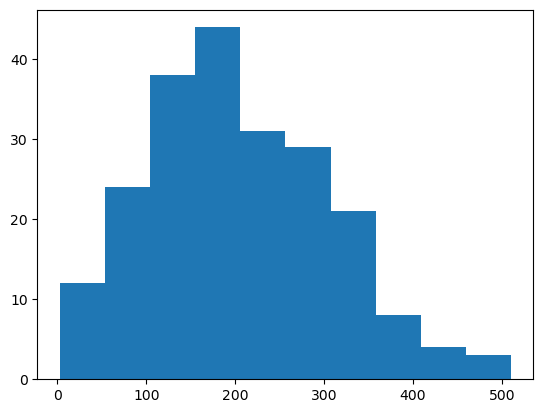

In [56]:
plt.hist(df.Calories)

(array([76., 35., 37., 23., 23.,  6.,  9.,  3.,  1.,  1.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

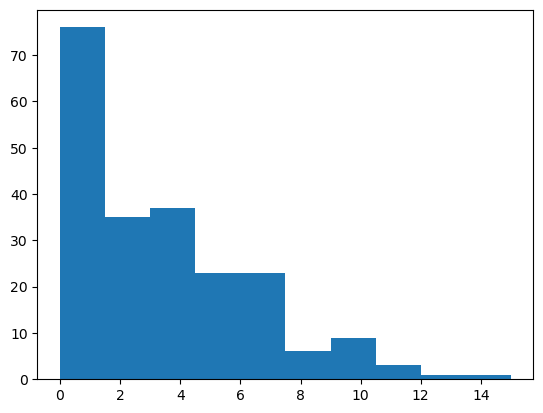

In [57]:
plt.hist(df.Total_Fat_g)

(array([21., 19., 38., 32., 39., 21., 18.,  8., 10.,  8.]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <BarContainer object of 10 artists>)

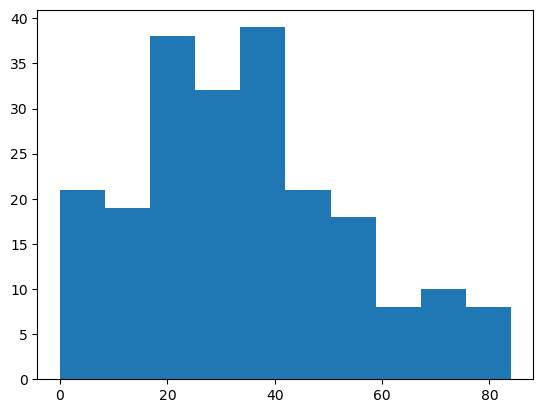

In [58]:
plt.hist(df.Sugars_g)

(array([18., 35., 40., 40., 18., 20., 13., 12., 12.,  6.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

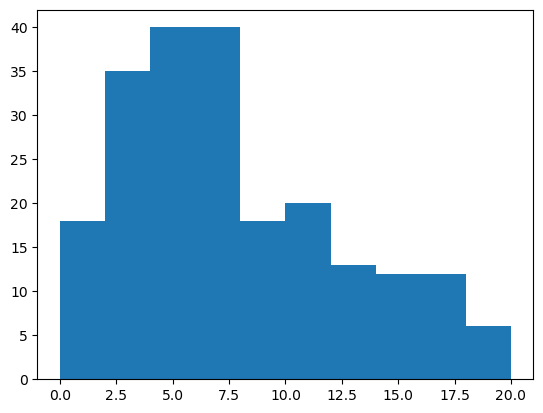

In [59]:
plt.hist(df.Protein_g)

(array([52., 59., 37., 48., 12.,  2.,  1.,  1.,  1.,  1.]),
 array([  0.,  41.,  82., 123., 164., 205., 246., 287., 328., 369., 410.]),
 <BarContainer object of 10 artists>)

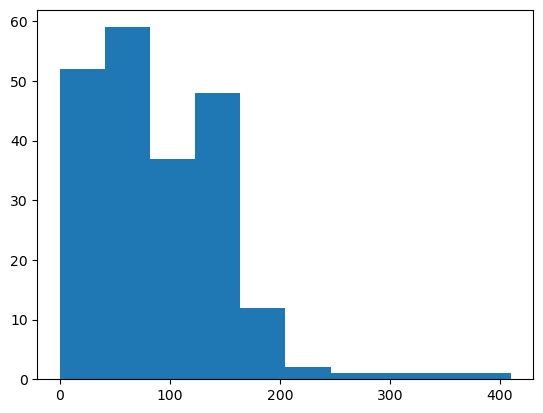

In [60]:
plt.hist(df.Caffeine_mg)

Histograms conclusion

These graphs helped me understand the distributions of calories, fat, sugar, protein, and caffeine

Calories and sugar look generally normally distributed.
Fat, protein, and caffeine are more right skewed.

### Data Dictionary

| Variable Name    | Definition |
| -------- | ------- |
| Beverage  | The name of the drink in question    |
| Beverage_category | The type of beverage in question     |
| Beverage_prep    |  How the beverage in question is being prepared, size and milk    |
| Calories  | The amount of calories in specific beverage    |
| Total_Fat_g | Total fat in grams in a specific beverage     |
| Sugars_g    | Total sugar in grams in a specfic beverage   |
| Protein_g | Total protein in grams in a specific beverage     |
| Caffeine_mg    | Total caffeine in milligrams in a specific beverage    |
| Size    | The size of the beverage    |
| Milk_type    | The kind of milk used to make the beverage    |

### Potential UI Components

I want to try to include pictures of the drinks in the dataset.  
- Layout: I aso invision text and drink selections on the left side of screen, and then visual aspects that change on the right side of the screen.  The right side of the screen changes based on what the user selects on the left side.  
- Icons and buttons: there will be buttons to manipulate what is displayed on the right side of the screen.  Whether it's an image of a drink, or a graph comparing calories, etc
- Navigational components: there will be a nav bar at the top to allow easy navigation
- Colors: I will definitely include the iconic starbucks green and I think white will balance the green out well too.

### Potential Data Visualization

- a colored line graph showing drinks that the user selects and comparing their nutritional value
- a table listing all the nutrional information in a concise and legible view of a selected drink
- a scatter plot of two nutrional information facts the the user can choose and filter which drinks they want to see
- a bar graph for a drink with the bars being the different nutrional information in question

In [61]:
df.to_csv('UPDATED_data.csv', index=False)